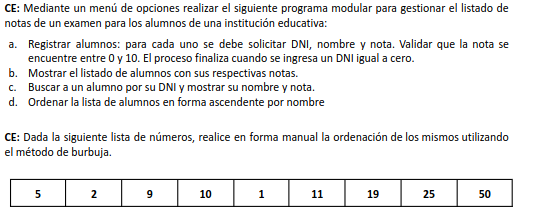

In [5]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import re


def pedir_entrada(prompt):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el cuadro de diálogo de entrada
    entrada = simpledialog.askstring(title="Entrada", prompt=prompt)

    # Cerrar la ventana principal
    root.destroy()

    return entrada


def mostrar_error(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de error
    messagebox.showerror("Error", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def mostrar_info(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de información
    messagebox.showinfo("Información", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def validar_entrada(entrada):
    if entrada.isalpha():
        mostrar_info(f"Entrada válida: {entrada}")
    else:
        mostrar_error("La entrada debe contener solo letras.")


def validarDni(lista):
    while True:
        dni = pedir_entrada("Ingrese el DNI: ")
        encontrado = False
        for i in lista:
            if i["DNI"] == dni:
                mostrar_info(
                    "El DNI ingresado ya está en la lista. Ingrese otro")
                encontrado = True
                break
        if not encontrado:
            if len(dni) == 8 and dni.isdigit():
                break
            else:
                mostrar_error(
                    "El DNI debe tener hasta 8 dígitos y solo contener números.")
    return dni


def validarDniABuscar():
    while True:
        dni = pedir_entrada("Ingrese el DNI: ")

        if len(dni) == 8 and dni.isdigit():
            break
        else:
            mostrar_error(
                "El DNI debe tener hasta 8 dígitos y solo contener números.")
    return dni


def validarNombre():
    while True:
        nombre = pedir_entrada("Ingrese el nombre: ")
        if nombre and re.match(r'^[a-zA-Z\s]+$', nombre):
            break
        else:
            mostrar_error("El nombre solo debe contener letras")
    return nombre


def validarNota():
    while True:
        try:
            nota = int(pedir_entrada("Ingrese la nota: "))
            if 0 <= nota <= 10:
                break
            else:
                mostrar_error("La nota debe estar entre 0 y 10")
        except ValueError:
            mostrar_error("Ingrese un valor correcto")
    return nota


def registrarAlumno(lista, num):
    mostrar_info(f"Alumno {num}")
    dni = validarDni(lista)
    nombre = validarNombre()
    nota = validarNota()

    alumno = {
        "DNI": dni,
        "Nombre y Apellido": nombre,
        "Nota": nota
    }
    lista.append(alumno)


def mostrarLista(lista):
    num = 1
    for alumno in lista:
        mostrar_info(f"""
                     {num} :
                     Nombre: {alumno["Nombre y Apellido"]}
                     Nota: {alumno["Nota"]}
        -------------------------------------------------
        """)
        num = num+1


def buscarAlumnoPorDni(lista):
    dniBuscar = validarDniABuscar()
    datos = ""
    encontrado = False
    for alumno in lista:
        if alumno["DNI"] == dniBuscar:
            datos = datos + f"""Dni: {alumno["DNI"]} \n
     Nombre: {alumno["Nombre y Apellido"]} \n
     Nota: {alumno["Nota"]}
    """
        encontrado = True
        break
    if encontrado:
        mostrar_info(datos)
    else:
        mostrar_info("Dni no encontrado")


def ordenarAlumnos(lista):
    n = len(lista)

    # Implementación de Bubble Sort
    for i in range(n - 1):
        # Iterar hasta el penúltimo elemento
        for j in range(n - i - 1):
            # Comparar el nombre del alumno actual con el siguiente
            if lista[j]["Nombre y Apellido"] > lista[j + 1]["Nombre y Apellido"]:
                # Intercambiar si están en el orden incorrecto
                lista[j], lista[j + 1] = lista[j + 1], lista[j]

    mostrarLista(lista)


def main():
    listaAlumnos = []
    cantAlumnos = 1

    while True:
        try:
            opcion = int(pedir_entrada("""Seleccione una opción: 
                                     1: Registrar alumno
                                     2: Mostrar lista de alumnos
                                     3: Buscar alumno por DNI
                                     4:
                                     5: 
                                     6: Salir 
                                     """
                                       ))
            if opcion:
                if opcion == 1:
                    registrarAlumno(listaAlumnos, cantAlumnos)
                    cantAlumnos = cantAlumnos+1
                elif opcion == 2:
                    if len(listaAlumnos) != 0:
                        mostrarLista(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 3:
                    if len(listaAlumnos) != 0:
                        buscarAlumnoPorDni(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 4:
                    if len(listaAlumnos) != 0:
                        ordenarAlumnos(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 5:
                    mostrar_info("Saliendo.....")
                    break
            else:
                mostrar_info("Opción incorrecta")
        except ValueError:
            mostrar_error("Ingrese un número válido")


main()

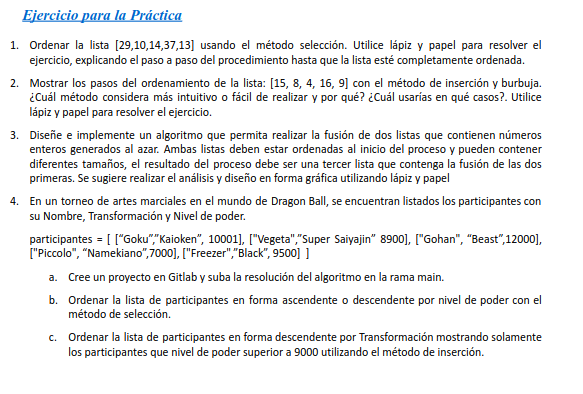